In [43]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import pylab   as plt

In [44]:
# hSBM specific libraries
from sbmtm import sbmtm
import graph_tool.all as gt

In [45]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [46]:
file = open('hSBM_no_deg_core_full_simple_model.pickle', 'rb')
model = pickle.load(file)

In [12]:
# The hierarchical levels themselves are represented by individual BlockState() instances
levels = model.state.get_levels()
for s in levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (22 nonempty), for graph <Graph object, undirected, with 38447 vertices and 119886 edges, 2 internal vertex properties, at 0x7fd6380dfaf0>, at 0x7fd60ffadd00>
<BlockState object with 23 blocks (2 nonempty), for graph <Graph object, undirected, with 38447 vertices and 21 edges, at 0x7fd60fca1430>, at 0x7fd60fca15e0>
<BlockState object with 3 blocks (1 nonempty), for graph <Graph object, undirected, with 23 vertices and 1 edge, at 0x7fd60fca4400>, at 0x7fd60fca19d0>


In [13]:
synth_file = open('synth_hSBM_no_deg_core_full_simple_model.pickle', 'rb')
synth_model = pickle.load(synth_file)

In [8]:
synth_levels = synth_model.get_levels()
for s in synth_levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (19 nonempty), for graph <Graph object, undirected, with 38447 vertices and 120313 edges, at 0x7f23b04b1a60>, at 0x7f238cc51100>
<BlockState object with 8 blocks (4 nonempty), for graph <Graph object, undirected, with 38447 vertices and 32 edges, at 0x7f238cc51cd0>, at 0x7f238cc97280>
<BlockState object with 3 blocks (2 nonempty), for graph <Graph object, undirected, with 8 vertices and 2 edges, at 0x7f238cc97e80>, at 0x7f238cc97ca0>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 3 vertices and 1 edge, at 0x7f238cc9bc70>, at 0x7f238cc9b790>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, at 0x7f238cc9e9d0>, at 0x7f238cc974f0>


In [14]:
def index_array(which_model,clabel):
    array = [i for i in range(len(which_model.get_clabel(l=0).a)) if which_model.get_clabel(l=0).a[i] == clabel]
    return array

In [15]:
print(set(model.state.get_clabel(l=0).a))
documents_index = index_array(which_model=model.state, clabel=0)
words_index = index_array(which_model=model.state, clabel=3)

{0, 3}


In [48]:
df = pd.DataFrame(data=0, index=[i for i in range(38417)], columns=[i for i in range(38417, (len(model.state.g.get_vertices())))])

for document in range(38417):
    neighbors = model.state.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in df.columns:
            if col in neighbors:
                df[col][document] = 1
df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38437,38438,38439,38440,38441,38442,38443,38444,38445,38446
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38413,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38415,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df = df.sort_index()


In [49]:
df = df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [77]:
print(set(synth_model.get_clabel(l=0).a))
print(len([ i for i in synth_model.get_clabel(l=0).a if i == 3]))
patients_index = index_array(which_model=synth_model, clabel=0) + index_array(which_model=synth_model, clabel=4) + index_array(which_model=synth_model, clabel=14) 
disease_index = index_array(which_model=synth_model, clabel=3) 

{0, 3, 4, 14}
30


In [15]:
synth_df = pd.DataFrame(data=0, index=[i for i in range(38417)], columns=[i for i in range(38417, (len(synth_model.g.get_vertices())))])
for document in range(38417):
    neighbors = synth_model.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in synth_df.columns:
            if col in neighbors:
                synth_df[col][document] = 1
synth_df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38437,38438,38439,38440,38441,38442,38443,38444,38445,38446
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
synth_df = synth_df.sort_index()

In [16]:
synth_df = synth_df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [50]:
df = df[['liver_disease', 'fluid_electrolyte', 'depression', 'drug_abuse',
       'other_neurological', 'coagulopathy', 'deficiency_anemias',
       'alcohol_abuse', 'solid_tumor', 'weight_loss', 'blood_loss_anemia',
       'peptic_ulcer', 'psychoses', 'aids', 'hypertension',
       'diabetes_complicated', 'renal_failure', 'cardiac_arrhythmias',
       'lymphoma', 'peripheral_vascular', 'diabetes_uncomplicated', 'obesity',
       'metastatic_cancer', 'congestive_heart_failure', 'chronic_pulmonary',
       'valvular_disease', 'hypothyroidism', 'paralysis',
       'pulmonary_circulation', 'rheumatoid_arthritis']]


In [51]:
clusters = model.state.get_levels()[0].get_blocks().a[0:38417]
clusters

PropertyArray([11728, 11728, 11728, ..., 11728, 11728, 11728], dtype=int32)

In [52]:
clusters = np.where(clusters.astype(str) == '11728', "A", clusters)
df['cluster'] = clusters

In [64]:
def outer_cluster_add(clusters, df):
    df['cluster'] = clusters.tolist()
    outer_cluster = []
    for i in clusters:
        if i == "A1" or i == "A2":
            outer_cluster.append("A")
        else:
            outer_cluster.append("B")
    df['outer_cluster'] = outer_cluster
    return df

In [53]:
df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,obesity,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,A
38413,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,A
38414,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,A
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [68]:
df.to_csv("no_deg_core_full_simple_elixhauser_comorbidity.csv",index=False)

In [20]:
print(set(synth_model.get_levels()[0].get_blocks().a))
for j in set(synth_model.get_levels()[0].get_blocks().a):
    print(len([i for i in synth_model.get_levels()[0].get_blocks().a if i == j]))
synth_clusters = synth_model.get_levels()[0].get_blocks().a[0:38417]
synth_df['cluster'] = synth_clusters

{27406, 38418, 38419, 38420, 38424, 38426, 38427, 31644, 38431, 34209, 38437, 38438, 38441, 36664, 20923, 1611, 10453, 26582, 22248, 2157, 32635}
1
1
1
1
2
1
1
2
3
1
3
2
1
1
2
1
38417
3
1
1
1


In [29]:
synth_clusters = np.where(synth_clusters.astype(str) == '10453', "A", synth_clusters)
synth_df['cluster'] = synth_clusters

In [30]:
synth_df = outer_cluster_add(synth_clusters, synth_df)
synth_df

NameError: name 'outer_cluster_add' is not defined

In [31]:
synth_df.to_csv('synth_no_deg_core_full_simple_elixhauser_comorbidity.csv', index=False)

In [24]:
df = pd.read_csv('no_deg_core_full_simple_elixhauser_comorbidity.csv')

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score

df_inner_clusters = df['cluster'].to_list()
synth_df_inner_clusters = synth_df['cluster'].to_list()
clusters_similarity = adjusted_rand_score(df_inner_clusters, synth_df_inner_clusters)
clusters_similarity

1.0

In [37]:
df = pd.read_csv("no_deg_core_full_simple_elixhauser_comorbidity.csv")

In [54]:
def count_df(df):
    df_count = df.copy()
    df_count['count'] = df_count.sum(axis=1)
    cluster_set = list(dict.fromkeys(df_count['cluster']))
    cluster_df = pd.DataFrame({cluster_set[0]: df_count[df_count['cluster'] == cluster_set[0]]['count'].value_counts()})
    if len(cluster_set) > 1:
        for cluster in cluster_set[1:]:
            cluster_counts = df_count[df_count['cluster'] == cluster]
            cluster_df = cluster_df.join(pd.DataFrame({cluster :cluster_counts['count'].value_counts()}), how='outer')
    cluster_df = cluster_df.fillna(0)
    return cluster_df

/tmp/ipykernel_6006/4269198207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count['count'] = df_count.sum(axis=1)


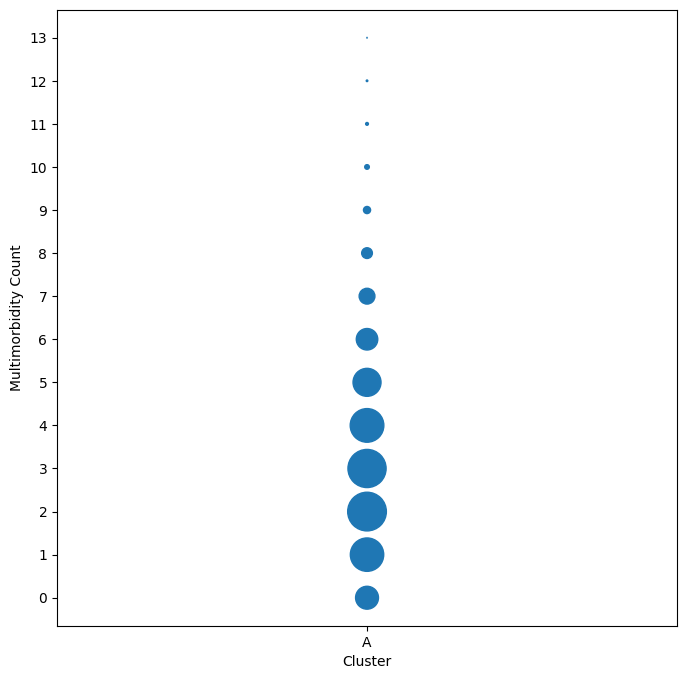

In [55]:
cluster_df = count_df(df)

fig, ax = plt.subplots(figsize=(8, 8))
for i, col in enumerate(cluster_df.columns):
    ax.scatter([i] * len(cluster_df), cluster_df.index.to_list(), s=cluster_df[col]*0.1, label=col)

ax.set_xlabel('Cluster')
ax.set_xticks(range(len(cluster_df.columns)))
ax.set_xticklabels(cluster_df.columns)
ax.set_ylabel('Multimorbidity Count')
ax.set_yticks(cluster_df.index)
ax.set_yticklabels(cluster_df.index)
plt.show()

/tmp/ipykernel_6006/4269198207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count['count'] = df_count.sum(axis=1)


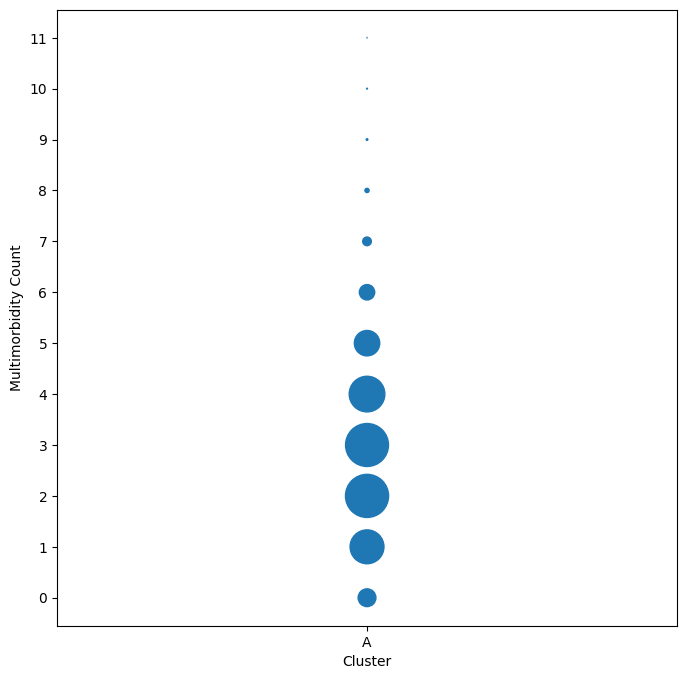

In [33]:
synth_cluster_df = count_df(synth_df)

fig, ax = plt.subplots(figsize=(8, 8))
for i, col in enumerate(synth_cluster_df.columns):
    ax.scatter([i] * len(synth_cluster_df), synth_cluster_df.index.to_list(), s=synth_cluster_df[col]*0.1, label=col)

ax.set_xlabel('Cluster')
ax.set_xticks(range(len(synth_cluster_df.columns)))
ax.set_xticklabels(synth_cluster_df.columns)
ax.set_ylabel('Multimorbidity Count')
ax.set_yticks(synth_cluster_df.index)
ax.set_yticklabels(synth_cluster_df.index)
plt.show()

In [117]:
from scipy.stats import chi2_contingency

contingency_table = np.array([df.iloc[:, 0:30].sum().values, synth_df.iloc[:, 0:30].sum().values])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat}\nDegrees of Freedom: {dof}\np-value: {p_val}")

Chi-Squared Statistic: 67186.03012617012
Degrees of Freedom: 29
p-value: 0.0


In [118]:
list1 = df['liver_disease'].to_list()
list2 = synth_df['liver_disease'].to_list()

mean1 = np.mean(list1)
mean2 = np.mean(list2)
std1 = np.std(list1)
std2 = np.std(list2)

contingency_table = np.array([[list1.count(1), list1.count(0)],
                              [list2.count(1), list2.count(0)]])

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat}\nDegrees of Freedom: {dof}\np-value: {p_val}")

Chi-Squared Statistic: 6.443945972245575
Degrees of Freedom: 1
p-value: 0.011133107634131235


In [128]:
synth_df.describe()

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,diabetes_uncomplicated,obesity,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis
count,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,...,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000
mean,0.085067,0.233308,0.086030,0.041050,0.095218,0.095765,0.024703,0.077726,0.026421,0.038056,...,0.169300,0.048937,0.052164,0.204987,0.172346,0.104251,0.087383,0.025822,0.054117,0.030117
std,0.278984,0.422942,0.280411,0.198407,0.293520,0.294272,0.155219,0.267743,0.160385,0.191334,...,0.375022,0.215738,0.222361,0.403698,0.377685,0.305589,0.282399,0.158606,0.226251,0.170911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
df.describe()

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,diabetes_uncomplicated,obesity,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis
count,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.00000,38417.000000,38417.000000,...,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000,38417.000000
mean,0.090273,0.279199,0.090975,0.041336,0.102220,0.103105,0.025197,0.08426,0.028060,0.037249,...,0.192545,0.049457,0.053596,0.239503,0.199313,0.109795,0.094437,0.026577,0.058906,0.030507
std,0.286576,0.448612,0.287578,0.199068,0.302942,0.304100,0.156726,0.27778,0.165148,0.189374,...,0.394304,0.216824,0.225222,0.426786,0.399489,0.312638,0.292440,0.160845,0.235452,0.171981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print(model.state.entropy())
print(synth_model.entropy())

335544.21859312244
343570.16886935366


In [12]:
gt.similarity(model.state.g, synth_model.g)

0.2427154151349506

In [57]:
from sklearn.metrics.cluster import adjusted_rand_score

df_inner_clusters = df['cluster'].to_list()
synth_df_inner_clusters = synth_df['cluster'].to_list()
clusters_similarity = adjusted_rand_score(df_inner_clusters, synth_df_inner_clusters)
clusters_similarity

1.0

In [36]:
from sklearn.metrics import jaccard_score, f1_score

jaccard_sim = jaccard_score(df.iloc[:, 0:30].to_numpy(), synth_df.iloc[:, 0:30].to_numpy(), average="samples", zero_division=1)
print("Jaccard similarity coefficient:", jaccard_sim)

Jaccard similarity coefficient: 0.11641729954456091


In [17]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
from statistics import mean

pvalue_avg = []
for i in range(df.iloc[:, 0:30].to_numpy().shape[1]):
    p_value = kstest(df.iloc[:, 0:30].to_numpy()[:,i], synth_df.iloc[:, 0:30].to_numpy()[:,i]).pvalue
    pvalue_avg.append(p_value)
    print(f"Column {i}: p-value = {p_value}")
mean(pvalue_avg)

Column 0: p-value = 0.6731606381584012
Column 1: p-value = 1.3662435959235923e-35
Column 2: p-value = 0.7333441907193046
Column 3: p-value = 1.0
Column 4: p-value = 0.30164347793957014
Column 5: p-value = 0.2506504088580217
Column 6: p-value = 1.0
Column 7: p-value = 0.3835376619272651
Column 8: p-value = 0.9999999994037746
Column 9: p-value = 1.0
Column 10: p-value = 1.0
Column 11: p-value = 1.0
Column 12: p-value = 1.0
Column 13: p-value = 1.0
Column 14: p-value = 0.0
Column 15: p-value = 1.0
Column 16: p-value = 0.06437109628193338
Column 17: p-value = 1.486443275085561e-79
Column 18: p-value = 1.0
Column 19: p-value = 0.9999999845193532
Column 20: p-value = 1.89930842071065e-09
Column 21: p-value = 1.0
Column 22: p-value = 0.9999999999995525
Column 23: p-value = 2.5683176364043142e-20
Column 24: p-value = 1.4400412188497337e-12
Column 25: p-value = 0.5942683146897416
Column 26: p-value = 0.293354129747162
Column 27: p-value = 1.0
Column 28: p-value = 0.7684326895326234
Column 29: p

0.6354254197892484

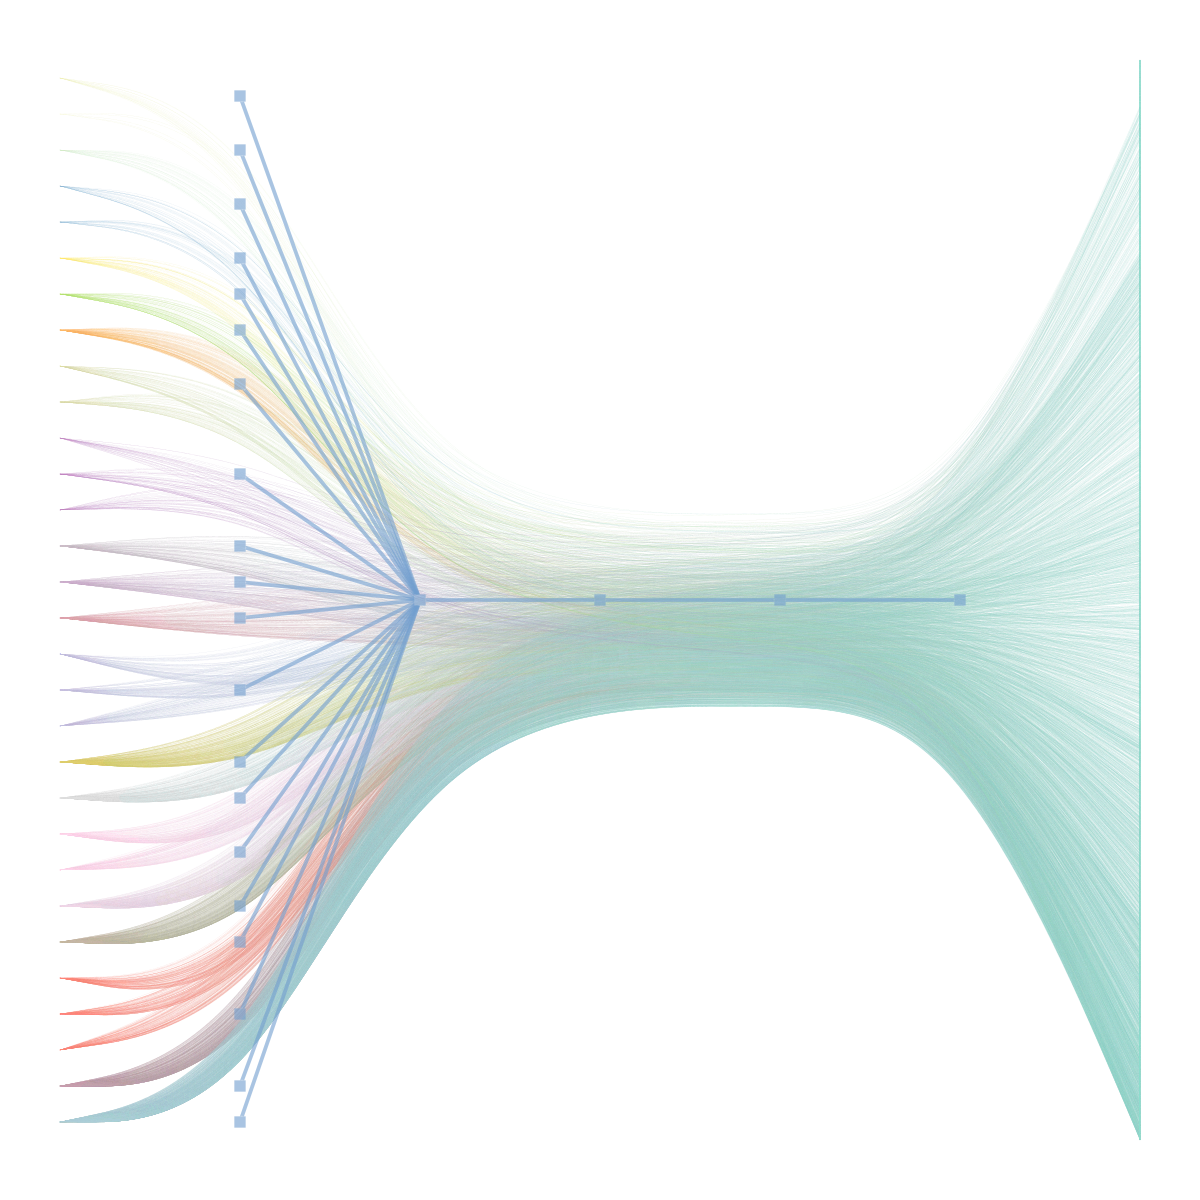

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd60ffad700, at 0x7fd5b4153460>,
 <GraphView object, directed, with 38471 vertices and 38470 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fd5e73d5670, at 0x7fd5b4150760>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fd5e73d5670, at 0x7fd5e73d55b0>, False), at 0x7fd5e73d5670>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd5e73d5670, at 0x7fd5e749e220>)

In [41]:
synth_model.draw(layout="bipartite",subsample_edges=6000,bip_aspect=1, hvertex_size=8, hedge_pen_width=1.9, output_size=(600, 600))

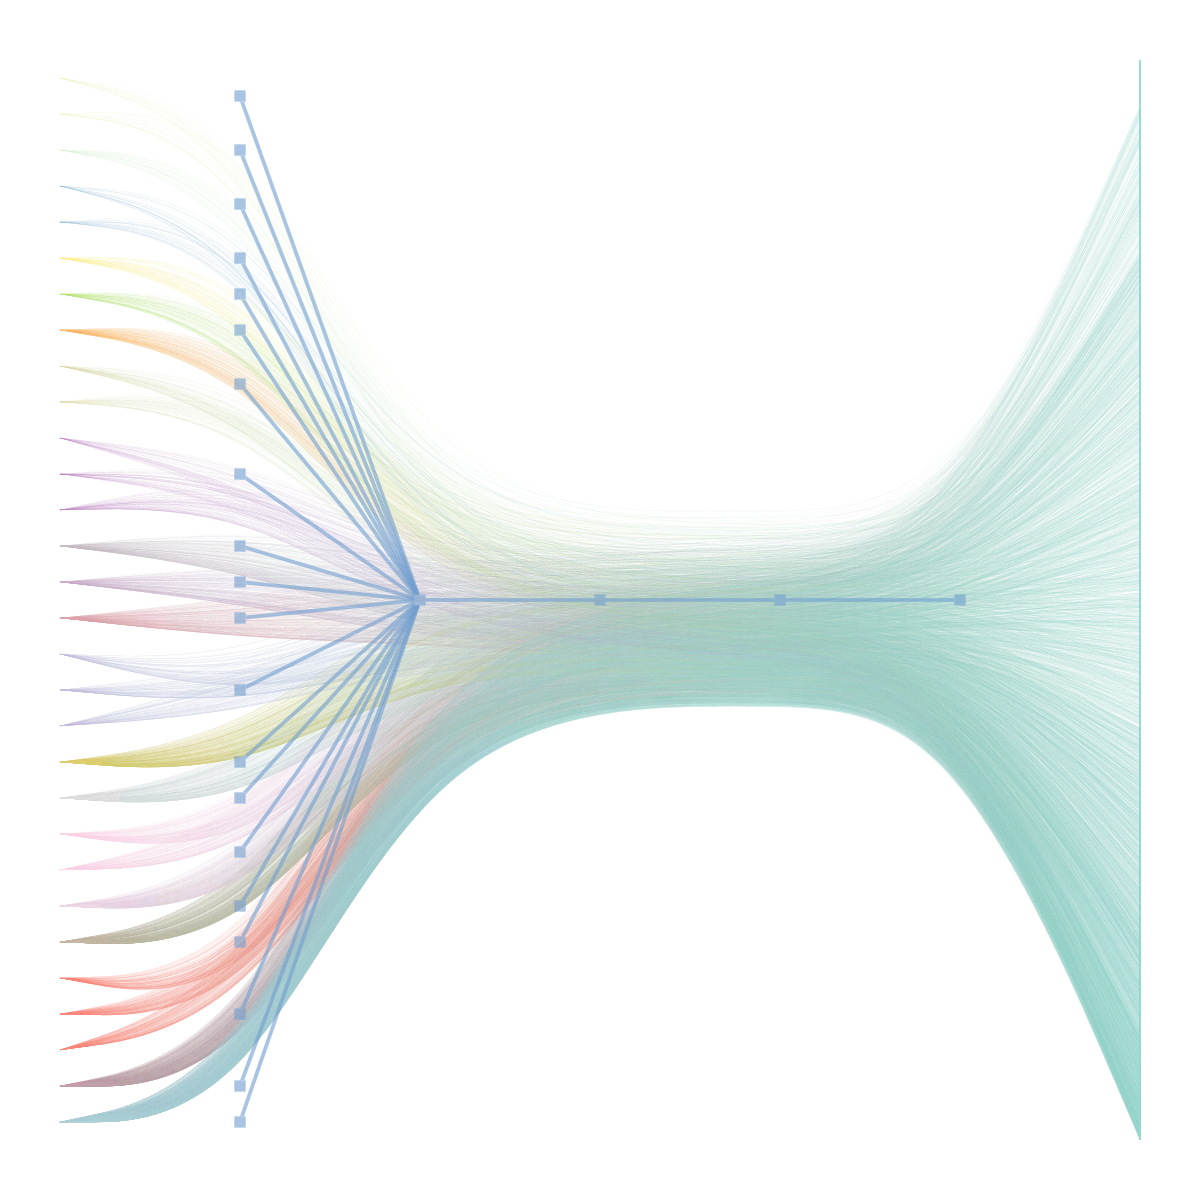

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd60ffad700, at 0x7fd5e70493a0>,
 <GraphView object, directed, with 38471 vertices and 38470 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fd5e7049f10, at 0x7fd5e72eb130>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fd5e7049f10, at 0x7fd5e7049190>, False), at 0x7fd5e7049f10>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd5e7049f10, at 0x7fd618a507f0>)

In [35]:
synth_model.draw(layout="bipartite",subsample_edges=6000,bip_aspect=1, hvertex_size=8, hedge_pen_width=1.9, output_size=(600, 600))

In [56]:
print(model.state.entropy())
print(synth_model.entropy())

335544.21859312255
345308.99377366615
